In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/market_impact_summer2025


In [ ]:
pip install -r /content/drive/MyDrive/market_impact_summer2025/requirements.txt

Data Extraction

In [ ]:
# import zipfile

# # Define the path to your ZIP file in Google Drive
# zip_path = '/content/drive/MyDrive/market_impact_summer2025/data/stock_afill_1min_adjsplitdiv.zip'

# # Define the directory where you want to extract the files
# extract_path = '/content/drive/MyDrive/market_impact_summer2025/data/stock_afill_1min_adjsplitdiv'

# # Create a ZipFile object and extract all its contents
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print(f"Files extracted successfully to {extract_path}")

Files extracted successfully to /content/drive/MyDrive/market_impact_summer2025/data/stock_afill_1min_adjsplitdiv


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/market_impact_summer2025/data/optionm_all_sm.csv.gz'
# Read just the header to get column names
column_names = pd.read_csv(file_path, compression='gzip', nrows=0).columns.tolist()
print(column_names)

['DATE', 'TIME_M', 'EX', 'SYM_ROOT', 'SYM_SUFFIX', 'TR_SCOND', 'SIZE', 'PRICE', 'TR_STOPIND', 'TR_CORR', 'TR_SEQNUM', 'TR_SOURCE', 'TR_RF']


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/market_impact_summer2025/data/taq_common.csv'
# Read just the header to get column names
df = pd.read_csv(file_path)
print(df['SYM_ROOT'].unique())
print(df.iloc[len(df)-1])

/tmp/ipython-input-19-213645104.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


['AA']
DATE            2013-12-31
TIME_M        16:00:00.458
EX                       P
SYM_ROOT                AA
SYM_SUFFIX              PR
TR_SCOND                 M
SIZE                   100
PRICE                 76.0
TR_STOPIND               N
TR_CORR                  0
TR_SEQNUM           457172
TR_SOURCE                C
TR_RF                  NaN
Name: 10262281, dtype: object


In [ ]:
# import pandas as pd
# from collections import defaultdict

# def inspect_large_csv_dtypes(file_path, chunk_size=1_000_000, max_chunks_to_check=10):
#     """
#     Analyzes a large CSV file in chunks to determine the data types present in each column.

#     Args:
#         file_path (str): The path to the gzipped CSV file.
#         chunk_size (int): The number of rows to read per chunk.
#         max_chunks_to_check (int): The maximum number of chunks to analyze.
#                                    Set to None to check the entire file (can be slow).
#     """
#     print(f"Analyzing file: {file_path}")
#     print(f"Reading in chunks of {chunk_size} rows.")
#     if max_chunks_to_check:
#         print(f"Will check a maximum of {max_chunks_to_check} chunks.\n")

#     # Use defaultdict to easily append to sets
#     column_types = defaultdict(set)
#     object_column_samples = defaultdict(set)

#     try:
#         # Create an iterator to read the file
#         chunk_iterator = pd.read_csv(
#             file_path,
#             chunksize=chunk_size,
#             compression='gzip',
#             low_memory=False # Important for accurate type checking in chunks
#         )

#         # Loop through the chunks
#         for i, chunk in enumerate(chunk_iterator):
#             if max_chunks_to_check and i >= max_chunks_to_check:
#                 print(f"Reached max_chunks_to_check limit of {max_chunks_to_check}. Stopping analysis.")
#                 break

#             print(f"--- Processing chunk {i+1} ---")
#             for col in chunk.columns:
#                 # Add the dtype of the column in this chunk to our set of types
#                 column_types[col].add(str(chunk[col].dtype))

#                 # If a column is of 'object' type, it might contain mixed types or just strings.
#                 # We collect some non-null samples to inspect them.
#                 if chunk[col].dtype == 'object':
#                     # Get up to 5 unique non-numeric samples from this chunk
#                     non_null_samples = chunk[col].dropna().unique()
#                     samples_to_add = [str(s) for s in non_null_samples[:5]]
#                     object_column_samples[col].update(samples_to_add)

#     except Exception as e:
#         print(f"An error occurred: {e}")
#         return

#     # --- Generate the Report ---
#     print("\n\n--- Analysis Complete: Data Type Report ---\n")
#     print("For each column, the following data types were found across all checked chunks:\n")

#     suggested_dtypes = {}

#     for col_name, dtypes_found in column_types.items():
#         print(f"Column: '{col_name}'")
#         print(f"  - Dtypes Found: {dtypes_found}")

#         if len(dtypes_found) > 1 or 'object' in dtypes_found:
#             print(f"  - ⚠️ WARNING: Mixed or object type. Treat as 'str'.")
#             print(f"  - Samples: {object_column_samples.get(col_name, 'N/A')}")
#             suggested_dtypes[col_name] = "'str',"
#         elif 'float64' in dtypes_found:
#             print("  - SUGGESTION: Use 'float32' to save memory.")
#             suggested_dtypes[col_name] = "'float32',"
#         elif 'int64' in dtypes_found:
#             print("  - SUGGESTION: Use 'int32' or 'int64' if numbers are large.")
#             suggested_dtypes[col_name] = "'int32',"
#         print("-" * 20)


#     # --- Print the boilerplate for the user ---
#     print("\n\n--- Suggested `dtype` Dictionary (Boilerplate) ---\n")
#     print("Copy, review, and complete the dictionary below. Ensure every column you need is included.")
#     print("your_dtypes_dict = {")
#     for col_name, suggestion in suggested_dtypes.items():
#         print(f"    '{col_name}': {suggestion}")
#     # Add columns that might have been missed (if they were all null)
#     all_cols = column_types.keys()
#     for col in all_cols:
#         if col not in suggested_dtypes:
#             print(f"    '{col}': 'str', # Check this column manually")
#     print("}")


# # --- How to use it ---
# if __name__ == '__main__':
#     file_path = '/content/drive/MyDrive/market_impact_summer2025/data/optionm_all_sm.csv.gz'
#     inspect_large_csv_dtypes(file_path, max_chunks_to_check=10)



In [ ]:
# import pandas as pd
# import pyarrow as pa
# import pyarrow.parquet as pq

# def convert_csv_to_parquet(csv_path, parquet_path, dtypes_dict, chunk_size=1_000_000):
#     """
#     Converts a large CSV file to a Parquet file efficiently by enforcing a consistent schema.

#     Args:
#         csv_path (str): Path to the source gzipped CSV file.
#         parquet_path (str): Path to the destination Parquet file.
#         dtypes_dict (dict): A dictionary specifying the data type for each column.
#         chunk_size (int): The number of rows to process in each chunk.
#     """
#     print("Starting conversion from CSV.GZ to Parquet...")

#     try:
#         # Create an iterator to read the large CSV file in chunks
#         chunk_iterator = pd.read_csv(
#             csv_path,
#             chunksize=chunk_size,
#             compression='gzip',
#             dtype=dtypes_dict,
#             low_memory=False
#         )

#         # Get the first chunk to establish the schema for the Parquet file
#         print("--- Processing chunk 1 ---")
#         first_chunk = next(chunk_iterator)

#         # FIX: Explicitly handle nulls in the problematic 'class' column
#         if 'class' in first_chunk.columns:
#             first_chunk['class'] = first_chunk['class'].fillna('')

#         # Explicitly define the PyArrow schema from the first chunk's dtypes.
#         # This schema will be enforced on all subsequent chunks.
#         pyarrow_schema = pa.Schema.from_pandas(first_chunk, preserve_index=False)

#         # Open a Parquet writer with the enforced schema
#         with pq.ParquetWriter(parquet_path, pyarrow_schema) as writer:
#             print("Writing chunk 1 to Parquet file...")
#             table = pa.Table.from_pandas(first_chunk, schema=pyarrow_schema, preserve_index=False)
#             writer.write_table(table)

#             # Loop through the remaining chunks and append them
#             for i, chunk in enumerate(chunk_iterator):
#                 print(f"--- Processing and writing chunk {i+2} ---")

#                 # FIX: Handle nulls in the problematic 'class' column for every chunk
#                 if 'class' in chunk.columns:
#                     chunk['class'] = chunk['class'].fillna('')

#                 # Convert chunk to table, enforcing the predefined schema
#                 table = pa.Table.from_pandas(chunk, schema=pyarrow_schema, preserve_index=False)
#                 writer.write_table(table)

#         print(f"\n✅ Conversion complete. Parquet file saved at: {parquet_path}")

#     except Exception as e:
#         print(f"\n❌ An error occurred during conversion: {e}")

# # --- How to use it ---
# if __name__ == '__main__':
#     # 1. Define the file paths
#     csv_file_path = '/content/drive/MyDrive/market_impact_summer2025/data/optionm_all_sm.csv.gz'
#     parquet_file_path = '/content/drive/MyDrive/market_impact_summer2025/data/optionm_all_sm.parquet'

#     # 2. PASTE YOUR DICTIONARY HERE
#     # This dictionary MUST be complete and accurate for all columns you intend to use.
#     # Any column with mixed types or potential nulls should be 'str'.
#     your_dtypes_dict = {
#         'secid': 'int32',
#         'date': 'str', # Dates are safer as strings initially
#         'symbol': 'str',
#         'symbol_flag': 'float32', # Use float for ints that might have NaNs
#         'exdate': 'str',
#         'last_date': 'str',
#         'cp_flag': 'str',
#         'strike_price': 'int64', # Using int64 as it's often multiplied by 1000
#         'best_bid': 'float32',
#         'best_offer': 'float32',
#         'volume': 'int32',
#         'open_interest': 'int32',
#         'impl_volatility': 'float32',
#         'delta': 'float32',
#         'gamma': 'float32',
#         'vega': 'float32',
#         'theta': 'float32',
#         'optionid': 'int32',
#         'cfadj': 'float32',
#         'am_settlement': 'float32',
#         'contract_size': 'float32',
#         'ss_flag': 'float32',
#         'forward_price': 'float32',
#         'expiry_indicator': 'str',
#         'root': 'str', # Use string for identifiers
#         'suffix': 'str',
#         'cusip': 'str',
#         'ticker': 'str',
#         'sic': 'str',
#         'index_flag': 'float32',
#         'exchange_d': 'float32',
#         'class': 'str',
#         'issue_type': 'str',
#         'industry_group': 'float32',
#         'issuer': 'str',
#         'div_convention': 'str', # Explicitly set to string
#         'exercise_style': 'str',
#         'am_set_flag': 'float32'
#     }

#     # 3. Run the conversion function
#     convert_csv_to_parquet(csv_file_path, parquet_file_path, your_dtypes_dict)


# Used Given TAQ Data


In [ ]:
# xc2773 I was testing with small amount of TAQ data and try to conduct some analysis
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


folder_path = '/content/drive/MyDrive/market_impact_summer2025/data/stock_afill_1min_adjsplitdiv'
all_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
all_files = all_files[:20]  # Number Control!!!

df_list = []

for file in all_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, header=None)

        if df.shape[1] != 6:
            print(f"Skipping {file}, shape = {df.shape}")
            continue

        df['ticker'] = file.split('_full')[0]

        df_list.append(df)

    except Exception as e:
        print(f"Error loading {file}: {e}")

df_all = pd.concat(df_list, ignore_index=True)

df_all.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'ticker']

df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
df_all[['open', 'high', 'low', 'close']] = df_all[['open', 'high', 'low', 'close']].astype(float)
df_all['volume'] = df_all['volume'].astype(int)

df_all['date'] = df_all['timestamp'].dt.date

#Aggregation
daily_summary = df_all.groupby(['ticker', 'date']).agg(
    avg_close=('close', 'mean'),
    total_volume=('volume', 'sum')
).reset_index()

print("Daily Summary for different stocks")
print(daily_summary.head(15))

print("Files that have been included:")
print(all_files)



Daily Summary for different stocks
   ticker        date  avg_close  total_volume
0    AACB  2025-04-07   9.911095          7900
1    AACB  2025-04-08   9.950000           100
2    AACB  2025-04-09   9.900000        125000
3    AACB  2025-04-10   9.880000        100800
4    AACB  2025-04-11   9.819600        641485
5    AACB  2025-04-14   9.893756        802123
6    AACB  2025-04-15   9.946429        101138
7    AACB  2025-04-16   9.910000          1409
8    AACB  2025-04-17   9.905000          1523
9    AACB  2025-04-21   9.903333           506
10   AACB  2025-04-22   9.905000         99620
11   AACG  2008-01-29   9.458406       1197616
12   AACG  2008-01-30   8.627759        218958
13   AACG  2008-01-31   9.348796        182234
14   AACG  2008-02-01   9.624064         28109
Files that have been included:
['AZZ_full_1min_adjsplitdiv.txt', 'AACB_full_1min_adjsplitdiv.txt', 'AACG_full_1min_adjsplitdiv.txt', 'AACIU_full_1min_adjsplitdiv.txt', 'AACIW_full_1min_adjsplitdiv.txt', 'AACT_full

In [ ]:
# How many days' data is included
print(daily_summary['ticker'].unique())
print(daily_summary['ticker'].value_counts())


['AACB' 'AACG' 'AACIU' 'AACIW' 'AACT' 'AAGRW' 'AAL' 'AAM' 'AAMC' 'AAME'
 'AAMI' 'AAOI' 'AAON' 'AAP' 'AAPG' 'AAPL' 'AARD' 'AAT' 'AATC' 'AZZ']
ticker
AAPL     6364
AAON     6363
AZZ      6321
AAP      5886
AAME     5786
AACG     4234
AAT      3589
AAOI     2910
AAL      2859
AAMC     2728
AAMI     2649
AATC      941
AACIW     475
AACT      456
AAGRW     194
AACIU     153
AAM       147
AAPG       61
AARD       47
AACB       11
Name: count, dtype: int64


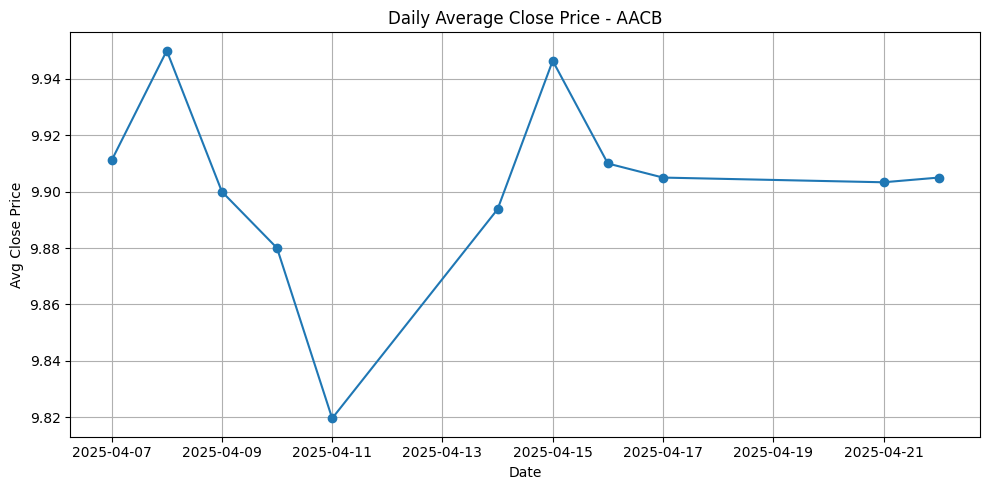

In [ ]:
# Data visualization for single stock(Close Price)
ticker_to_plot = 'AACB' #you can change stock's name here
df_plot = daily_summary[daily_summary['ticker'] == ticker_to_plot]

plt.figure(figsize=(10, 5))
plt.plot(df_plot['date'], df_plot['avg_close'], marker='o')
plt.title(f'Daily Average Close Price - {ticker_to_plot}')
plt.xlabel('Date')
plt.ylabel('Avg Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


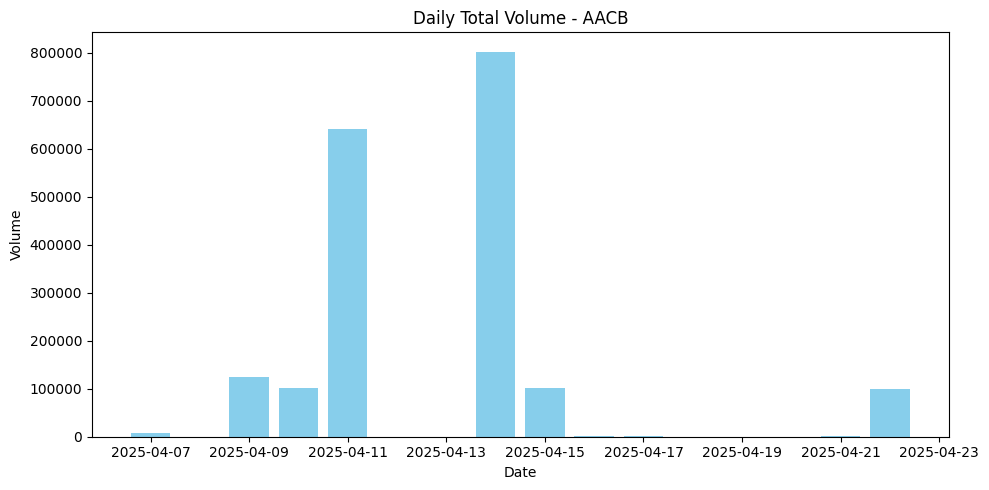

In [ ]:
# Data visualization for single stock(Volume) "AACB" is the example here
plt.figure(figsize=(10, 5))
plt.bar(df_plot['date'], df_plot['total_volume'], color='skyblue')
plt.title(f'Daily Total Volume - {ticker_to_plot}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


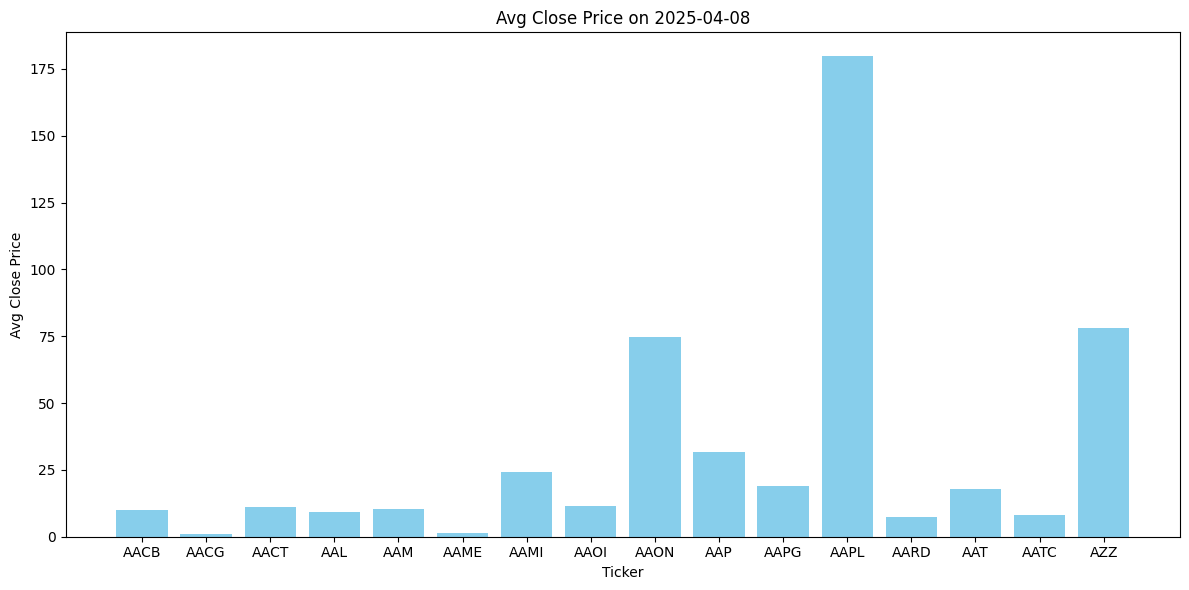

In [ ]:
# Multiple stocks' average close price on a date of choice
target_date = pd.to_datetime('2025-04-08').date() #change date here
df_date = daily_summary[daily_summary['date'] == target_date]

plt.figure(figsize=(12, 6))
plt.bar(df_date['ticker'], df_date['avg_close'], color='skyblue')
plt.title(f'Avg Close Price on {target_date}')
plt.xlabel('Ticker')
plt.ylabel('Avg Close Price')
plt.tight_layout()
plt.show()


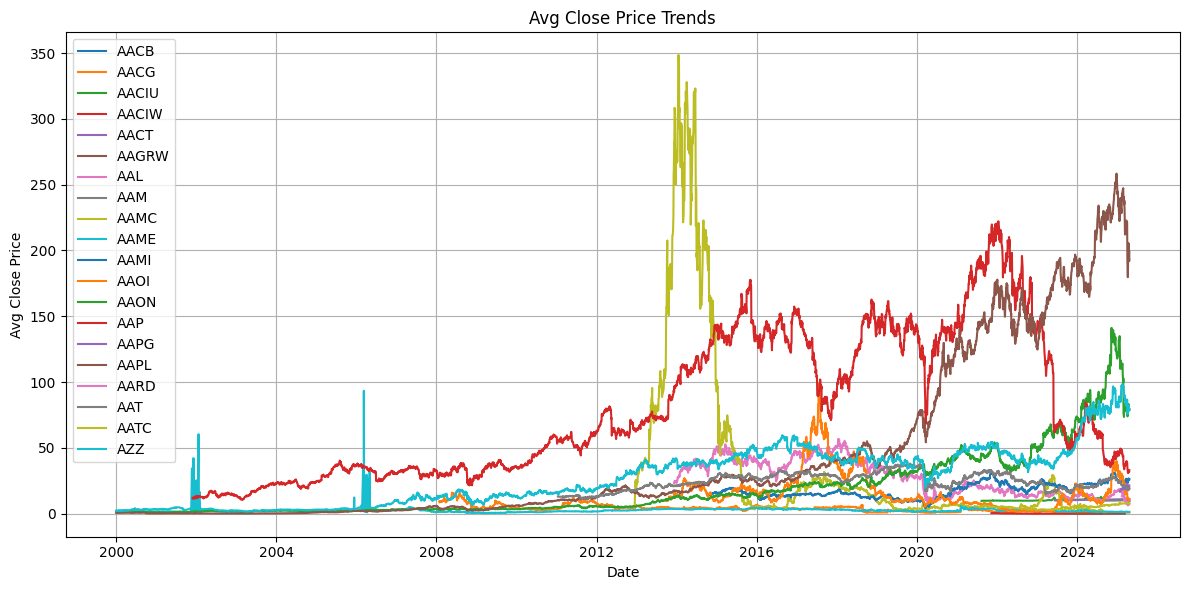

In [ ]:
# Trend for multiple stocks
tickers = daily_summary['ticker'].unique()
plt.figure(figsize=(12, 6))

for ticker in tickers:
    df_tmp = daily_summary[daily_summary['ticker'] == ticker]
    plt.plot(df_tmp['date'], df_tmp['avg_close'], label=ticker)

plt.title('Avg Close Price Trends')
plt.xlabel('Date')
plt.ylabel('Avg Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import gzip
import csv

def calculate_mean_stream_csv_gzip(csv_path, dtypes_dict):
    """
    Calculates the mean of the 'best_bid' column from a large gzipped CSV file
    by streaming data line by line, avoiding full in-memory load or intermediate disk storage.

    Args:
        csv_path (str): Path to the source gzipped CSV file.
        dtypes_dict (dict): A dictionary specifying the data type for each column.
                            Used here to identify column names and their expected types.

    Returns:
        float: The calculated mean of the 'best_bid' column, or None if an error occurs.
    """
    print(f"Attempting to calculate mean of 'best_bid' from CSV.GZ by streaming...")

    total_best_bid = 0.0
    count_best_bid = 0
    best_bid_col_index = -1
    class_col_index = -1 # To handle the 'class' column nulls if present
    rows_processed = 0

    try:
        # Open the gzipped file in text mode ('rt')
        with gzip.open(csv_path, 'rt', encoding='utf-8') as f:
            # Use csv.reader to handle CSV parsing
            reader = csv.reader(f)

            # Read the header row to find the indices of the required columns
            header = next(reader)
            try:
                best_bid_col_index = header.index('best_bid')
                if 'class' in header:
                    class_col_index = header.index('class')
                print(f"Found 'best_bid' at index {best_bid_col_index}.")
                if class_col_index != -1:
                    print(f"Found 'class' at index {class_col_index}.")
            except ValueError as e:
                print(f"❌ Error: Required column not found in CSV header: {e}")
                return None

            # Iterate through each row in the CSV file
            for row in reader:
                rows_processed += 1
                # Print progress every 100,000 rows
                if rows_processed % 10000000 == 0:
                    print(f"Processed {rows_processed} rows...")

                # Handle nulls in the 'class' column as per your original code
                if class_col_index != -1 and row[class_col_index] == '':
                    row[class_col_index] = '' # Ensure empty string for nulls

                try:
                    # Extract the 'best_bid' value and convert it to a float
                    best_bid_str = row[best_bid_col_index]
                    if best_bid_str: # Only attempt conversion if the string is not empty
                        best_bid_value = float(best_bid_str)
                        total_best_bid += best_bid_value
                        count_best_bid += 1
                except (ValueError, IndexError) as e:
                    # If conversion fails (e.g., non-numeric data) or column is missing,
                    # skip this row for the 'best_bid' calculation.
                    # print(f"Skipping row {rows_processed} due to best_bid conversion error: {e} (Value: '{best_bid_str}')")
                    pass # Silently skip rows with invalid 'best_bid' data

        # Check if any valid 'best_bid' values were found
        if count_best_bid == 0:
            print("No valid 'best_bid' values found to calculate mean.")
            return None

        # Calculate the mean
        mean_best_bid = total_best_bid / count_best_bid
        print(f"\n✅ Successfully calculated the mean of 'best_bid'.")
        print(f"Total rows processed: {rows_processed}")
        print(f"Total valid 'best_bid' values: {count_best_bid}")
        print(f"Mean of 'best_bid': {mean_best_bid}")

        return mean_best_bid

    except FileNotFoundError:
        print(f"❌ Error: File not found at {csv_path}")
        return None
    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")
        return None

# --- How to use it ---
if __name__ == '__main__':
    # Define the file path
    csv_file_path = '/content/drive/MyDrive/market_impact_summer2025/data/optionm_all_sm.csv.gz'

    # PASTE YOUR DICTIONARY HERE (from your original code)
    # This dictionary is used to understand the column names and their expected types,
    # but the actual parsing is done manually in the streaming function.
    your_dtypes_dict = {
        'secid': 'int32',
        'date': 'str',
        'symbol': 'str',
        'symbol_flag': 'float32',
        'exdate': 'str',
        'last_date': 'str',
        'cp_flag': 'str',
        'strike_price': 'int64',
        'best_bid': 'float32',
        'best_offer': 'float32',
        'volume': 'int32',
        'open_interest': 'int32',
        'impl_volatility': 'float32',
        'delta': 'float32',
        'gamma': 'float32',
        'vega': 'float32',
        'theta': 'float32',
        'optionid': 'int32',
        'cfadj': 'float32',
        'am_settlement': 'float32',
        'contract_size': 'float32',
        'ss_flag': 'float32',
        'forward_price': 'float32',
        'expiry_indicator': 'str',
        'root': 'str',
        'suffix': 'str',
        'cusip': 'str',
        'ticker': 'str',
        'sic': 'str',
        'index_flag': 'float32',
        'exchange_d': 'float32',
        'class': 'str',
        'issue_type': 'str',
        'industry_group': 'float32',
        'issuer': 'str',
        'div_convention': 'str',
        'exercise_style': 'str',
        'am_set_flag': 'float32'
    }

    # Call the function to calculate the mean using the streaming method
    calculated_mean = calculate_mean_stream_csv_gzip(csv_file_path, your_dtypes_dict)

    if calculated_mean is not None:
        print(f"\nFinal calculated mean of 'best_bid': {calculated_mean}")


In [ ]:
import gzip
import csv

def preview_csv_gz(csv_path, num_rows=5):
    """
    Preview the first few rows of a large gzipped CSV file without loading it entirely.
    This is memory-efficient and prints out sample rows for inspection.
    """
    print(f"Previewing first {num_rows} data rows from: {csv_path}")

    try:
        with gzip.open(csv_path, 'rt', encoding='utf-8') as f:
            reader = csv.reader(f)

            header = next(reader)
            print("Header columns:")
            print(header)
            print("Sample rows:")

            for i, row in enumerate(reader):
                print(row)
                if i + 1 >= num_rows:
                    break

    except Exception as e:
        print(f"Error reading file: {e}")

csv_file_path = '/content/drive/MyDrive/market_impact_summer2025/data/optionm_all_sm.csv.gz'
preview_csv_gz(csv_file_path, num_rows=5)


In [ ]:
import pandas as pd
import wrds

def print_tables_with_prefix(library_name: str, prefix: str) -> None:
    """
    Connects to WRDS and prints all table names in a given library
    that start with a specific prefix.

    Args:
        library_name (str): The name of the WRDS library to search.
        prefix (str): The prefix to filter table names by.
    """
    conn = None  # Initialize conn to None
    try:
        # Establish a connection to WRDS.
        # Ensure your .pgpass file is configured for credentials.
        print("Connecting to WRDS...")
        conn = wrds.Connection()
        print("Connection successful.")

        # Retrieve the list of all tables in the specified library.
        print(f"Fetching tables from the '{library_name}' library...")
        tables = conn.list_tables(library=library_name)
        print(f"Found {len(tables)} tables. Searching for prefix '{prefix}'...")

        # Use a list comprehension to find all tables that start with the prefix.
        matching_tables = [table for table in tables if table.startswith(prefix)]

        # Check if any matching tables were found and print them.
        if matching_tables:
            print(f"\nTables in '{library_name}' starting with '{prefix}':")
            for table_name in matching_tables:
                print(f"- {table_name}")
            print(f"\nFound {len(matching_tables)} matching tables.")
        else:
            print(f"\nNo tables found in '{library_name}' starting with the prefix '{prefix}'.")


    except Exception as e:
        # Handle potential connection errors or other issues.
        print(f"\nAn error occurred: {e}")
        print("Please check your WRDS credentials and network connection.")

# --- Main execution ---
if __name__ == "__main__":
    # Specify the library and prefix you want to search for.
    target_library = "taqmsec"
    target_prefix = "wct"
    print_tables_with_prefix(target_library, target_prefix)


# Downloading Data from WRDS

In [ ]:
!pip install wrds

In [ ]:
import pandas as pd
import wrds
import gc

# Establish connection to WRDS
conn = wrds.Connection()

# Define the input data for the query
tickers = ['MSFT'] #['UNH','BA']
years = [2021] #[2013,2015,2017,2019,2021]

def query_taq_data(ticker, start_date_time, end_date_time):
    """
    Queries TAQ data for a given ticker and time range.
    """
    start_date = start_date_time.split(" ")[0].replace("-", "")
    start_time = start_date_time.split(" ")[1]
    end_date = end_date_time.split(" ")[0].replace("-", "")
    end_time = end_date_time.split(" ")[1]
    table_name = f"wct_{year}"
    #table_name = f"complete_nbbo_{start_date}"

    query = f"""
        SELECT *
        FROM taqmsec.{table_name}
        WHERE sym_root = '{ticker}'
        AND time_m >= '{start_time}'
        AND time_m <= '{end_time}'
    """

    try:
        result_df = conn.raw_sql(query)
        return result_df
    except Exception as e:
        print(f"An error occurred for {ticker}: {e}")
        return pd.DataFrame()

# Loop through the input dataframe to query data for each ticker
for ticker in tickers:
  for year in years:
    print(ticker,year)
    data = {
        "tickers": ticker,
        "start_date_time": [f"{year}-01-02 09:30:00"],
        "end_date_time": [f"{year}-12-31 16:00:00"],
    }
    df_input = pd.DataFrame(data)
    all_data = []
    for index, row in df_input.iterrows():
        ticker = row["tickers"]
        start_date_time = row["start_date_time"]
        end_date_time = row["end_date_time"]

        taq_data = query_taq_data(ticker, start_date_time, end_date_time)

        if not taq_data.empty:
            taq_data["ticker"] = ticker
            #all_data.append(taq_data)

    # Concatenate all dataframes and save to a CSV file
    #if taq_data:
        #final_df = pd.concat(all_data)
        output_path = f"/content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/{year}/{ticker}_wct_data.csv"
        taq_data.to_csv(output_path, index=False)
        del taq_data
        gc.collect()

Enter your WRDS username [root]:mattc2001
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done
MSFT 2021


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2013/AA_wct_data_mod.csv'
# Read just the header to get column names
column_names = pd.read_csv(file_path,nrows=0).columns.tolist()
print(column_names)

['date', 'time_m', 'sym_root', 'sym_suffix', 'type', 'ex', 'tr_scond', 'size', 'price', 'tr_seqnum', 'qtime', 'nbo', 'nbb', 'nboqty', 'nbbqty', 'ticker', 'side']


Available tickers

In [ ]:
!ls /content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2021

AA_wct_data.csv    BAC_wct_data.csv  JNJ_wct_data.csv  UNH_wct_data.csv
AMZN_wct_data.csv  BA_wct_data.csv   JPM_wct_data.csv


# Identifying Side Of Trades

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

def classify_trade_side(df: pd.DataFrame) -> pd.DataFrame:
    """
    Classifies the side of each trade (buy/sell) using the Lee-Ready algorithm.

    This function is designed to work on a DataFrame chunk.

    The algorithm works in two main steps:
    1. Quote Rule: Compares the trade price to the midpoint of the bid-ask spread.
       - Trade price > midpoint -> Buy
       - Trade price < midpoint -> Sell
    2. Tick Rule (for trades at the midpoint): Compares the trade price to the
       previous trade's price.
       - Price > Previous Price (uptick) -> Buy
       - Price < Previous Price (downtick) -> Sell
       - Price == Previous Price (zero-tick) -> Carry forward the last classification.

    Args:
        df (pd.DataFrame): DataFrame chunk containing trade and quote data.
                           Must include 'price', 'nbb', and 'nbo' columns.

    Returns:
        pd.DataFrame: The original DataFrame with an added 'side' column.
    """
    # --- Data Cleaning: Force relevant columns to numeric types ---
    # Coerce errors will turn any non-numeric values (like text) into NaN
    numeric_cols = ['price', 'nbb', 'nbo']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop any rows where price or quote data is missing, as they cannot be classified.
    df.dropna(subset=numeric_cols, inplace=True)
    if df.empty:
        return df # Return empty df if all rows were dropped

    # --- Step 1: The Quote Rule ---
    # Calculate the midpoint of the National Best Bid and Offer (NBBO)
    df['midpoint'] = (df['nbb'] + df['nbo']) / 2

    # Initialize the 'side' column as numpy nan
    df['side'] = np.nan

    # Classify trades based on their price relative to the midpoint
    df.loc[df['price'] > df['midpoint'], 'side'] = 'buy'
    df.loc[df['price'] < df['midpoint'], 'side'] = 'sell'

    # --- Step 2: The Tick Rule (for trades at the midpoint) ---
    # Identify trades that occurred exactly at the midpoint
    at_midpoint_indices = df[df['price'] == df['midpoint']].index

    # Calculate the price difference between consecutive trades (the "tick")
    # A positive diff is an uptick, negative is a downtick.
    price_diff = df['price'].diff()

    # Apply the tick rule for trades at the midpoint
    # For zero-ticks (price_diff == 0), this will default to 'sell', but we fix this next.
    df.loc[at_midpoint_indices, 'side'] = np.where(price_diff[at_midpoint_indices] > 0, 'buy', 'sell')

    # --- Step 3: Handle Zero-Ticks and Carry-Forward ---
    # For trades at the midpoint where the price hasn't changed (zero-tick),
    # we carry forward the last known classification.
    # The `fillna` method with `method='ffill'` (forward fill) is perfect for this.
    # This also handles the zero-tick cases from the previous step.
    df['side'] = df['side'].fillna(method='ffill')

    # Handle any remaining NaNs at the beginning of the file by back-filling
    df['side'] = df['side'].fillna(method='bfill')

    # Clean up the intermediate 'midpoint' column
    df = df.drop(columns=['midpoint'])

    return df

# --- Main execution block (Optimized for Large Files) ---
if __name__ == '__main__':
    # Define the column names as provided
    column_names = [
        'date', 'time_m', 'sym_root', 'sym_suffix', 'type', 'ex',
        'tr_scond', 'size', 'price', 'tr_seqnum', 'qtime', 'nbo',
        'nbb', 'nboqty', 'nbbqty', 'ticker'
    ]

    # --- Define data types for columns to prevent DtypeWarning and improve memory usage ---
    # Using float32 instead of float64 to save memory, as it provides enough precision.
    column_dtypes = {
        'date': 'str',
        'time_m': 'str',
        'sym_root': 'str',
        'sym_suffix': 'str',
        'type': 'str',
        'ex': 'str',
        'tr_scond': 'str',
        'size': 'float32',
        'price': 'float32',
        'tr_seqnum': 'float64', # Sequence numbers can be large, keep as float64
        'qtime': 'str',
        'nbo': 'float32',
        'nbb': 'float32',
        'nboqty': 'float32',
        'nbbqty': 'float32',
        'ticker': 'str'
    }


    # Specify the path to your data file and the desired output file
    file_path = '/content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2013/AA_wct_data.csv'
    output_path = '/content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2013/AA_wct_data_mod.csv'

    # --- Optimization for Large Files ---
    # We process the file in chunks to avoid loading the entire file into memory.
    # You can adjust chunksize based on your available RAM.
    chunksize = 1_000_000

    # This will hold the last row of the previous chunk to ensure the 'tick rule'
    # works correctly across chunk boundaries.
    last_row_of_previous_chunk = None

    # This will keep a running total of the buy/sell counts
    total_counts = Counter()

    # This flag ensures the header is only written for the first chunk
    is_first_chunk = True

    print(f"Reading and processing {file_path} in chunks of {chunksize} rows...")
    print(f"Output will be saved to: {output_path}")

    try:
        # Create an iterator that reads the CSV in chunks
        # Added skiprows=1 to skip the header row in the source file.
        chunk_iterator = pd.read_csv(
            file_path,
            header=None,
            names=column_names,
            chunksize=chunksize,
            dtype=column_dtypes, # Use the new dtype dictionary
            low_memory=False, # Recommended when specifying dtypes
            skiprows=1 # Skip the first row (header) of the input file
        )

        for i, chunk in enumerate(chunk_iterator):
            print(f"  - Processing chunk {i+1}...")

            # Always sort each chunk to ensure correct trade order for the tick rule
            chunk = chunk.sort_values(by='tr_seqnum').reset_index(drop=True)

            # Prepend the last row of the previous chunk to the current one
            # This ensures the .diff() and .ffill() methods have context.
            if last_row_of_previous_chunk is not None:
                chunk = pd.concat([last_row_of_previous_chunk, chunk], ignore_index=True)

            # Classify the trades in the current combined chunk
            classified_chunk = classify_trade_side(chunk.copy())

            # If this isn't the first chunk, drop the first row of the result,
            # as it was from the previous chunk and has already been saved.
            if last_row_of_previous_chunk is not None and not classified_chunk.empty:
                classified_chunk = classified_chunk.iloc[1:]

            # Store the last row of the *original* chunk for the next iteration
            last_row_of_previous_chunk = chunk.iloc[-1:].copy()

            # --- Write chunk to output file and update counts ---
            if not classified_chunk.empty:
                # Update the running total of counts
                total_counts.update(classified_chunk['side'].value_counts().to_dict())

                # Write the processed chunk to the output CSV
                if is_first_chunk:
                    # For the first chunk, write with a header
                    classified_chunk.to_csv(output_path, index=False, mode='w', header=True)
                    is_first_chunk = False
                else:
                    # For subsequent chunks, append without a header
                    classified_chunk.to_csv(output_path, index=False, mode='a', header=False)

        print(f"\nProcessing complete. Classified data saved to {output_path}")

        # Display the final aggregated results
        print("\n--- Final Classification Results ---")
        print("Total value counts for the 'side' column:")
        print(pd.Series(total_counts))


    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}")
        print("Please make sure the file path is correct and the file exists.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Visualize Distribution of Side of Trade

/tmp/ipython-input-7-839720045.py:18: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILE_PATH)


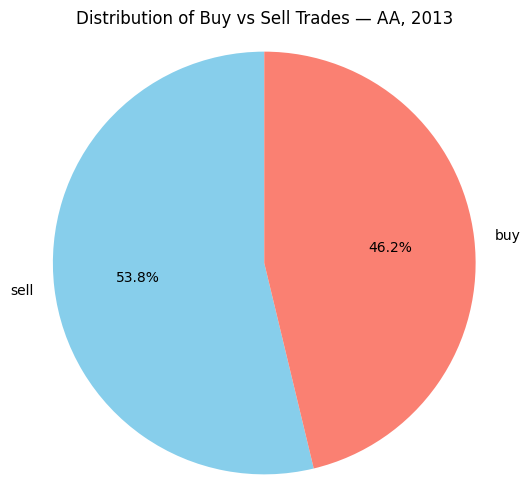

In [ ]:
# Buy/Sell Percentage Distribution
import pandas as pd
import matplotlib.pyplot as plt
import re

FILE_PATH = "/content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2013/AA_wct_data_mod.csv" # file path of your choice

match = re.search(r'consolidated_trades/(\d{4})/(\w+)_wct_data_mod\.csv', FILE_PATH)
if match:
    year = match.group(1)
    ticker = match.group(2)
else:
    year = "Unknown"
    ticker = "Unknown"

df = pd.read_csv(FILE_PATH)

side_counts = df['side'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    side_counts,
    labels=side_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title(f'Distribution of Buy vs Sell Trades — {ticker}, {year}')
plt.axis('equal')
plt.show()


In [ ]:
# Organize timestamp(set the foundation for the following graphs)
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

FILE_PATH = "/content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2013/AA_wct_data_mod.csv" # file path of your choice
df = pd.read_csv(FILE_PATH)

file_name = os.path.basename(FILE_PATH)
ticker = re.match(r"([A-Z]+)_", file_name).group(1)
year = re.search(r"/(\d{4})/", FILE_PATH).group(1)

if 'timestamp' not in df.columns:
    df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time_m'], errors='coerce')

df = df[df['side'].isin(['buy', 'sell'])]

df = df.sort_values('timestamp')


/tmp/ipython-input-10-2380918171.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILE_PATH)


/tmp/ipython-input-11-1095877718.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


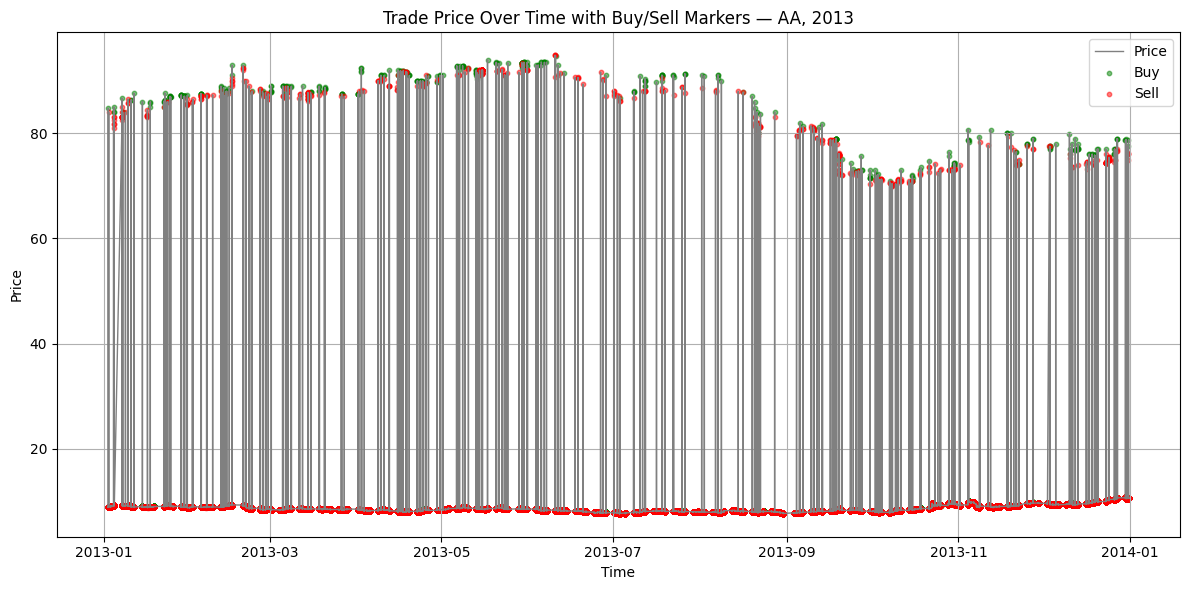

In [ ]:
# Trade Price Over Time with Buy/Sell Markers(1)
buy_trades = df[df['side'] == 'buy']
sell_trades = df[df['side'] == 'sell']

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='Price', color='gray', linewidth=1)
plt.scatter(buy_trades['timestamp'], buy_trades['price'], label='Buy', color='green', s=10, alpha=0.5)
plt.scatter(sell_trades['timestamp'], sell_trades['price'], label='Sell', color='red', s=10, alpha=0.5)
plt.legend()
plt.title(f"Trade Price Over Time with Buy/Sell Markers — {ticker}, {year}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

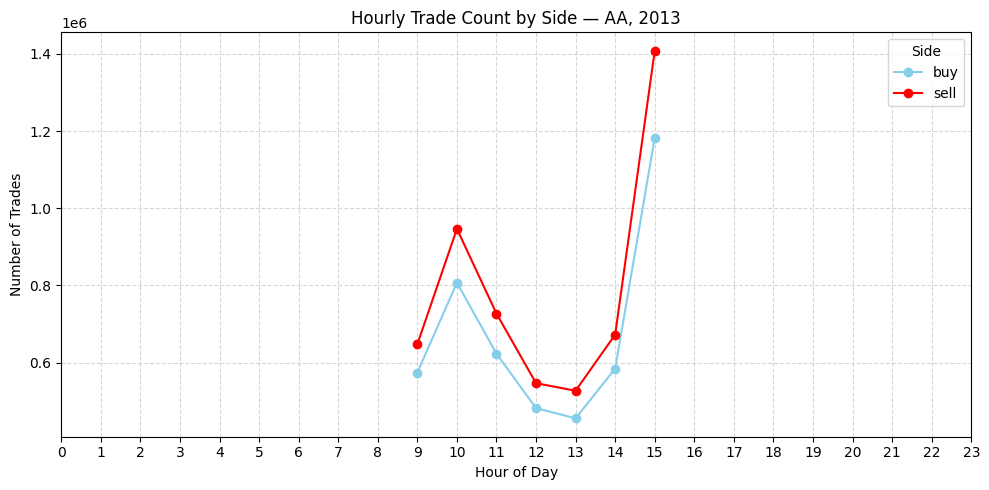

In [ ]:
# Hourly Trade By Side(2)
df['hour'] = df['timestamp'].dt.hour
hourly_counts = df.groupby(['hour', 'side']).size().unstack().fillna(0)

hourly_counts.plot(kind='line', marker='o', figsize=(10, 5), color=['skyblue', 'red'])
plt.title(f'Hourly Trade Count by Side — {ticker}, {year}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trades')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.legend(title='Side')
plt.tight_layout()
plt.show()


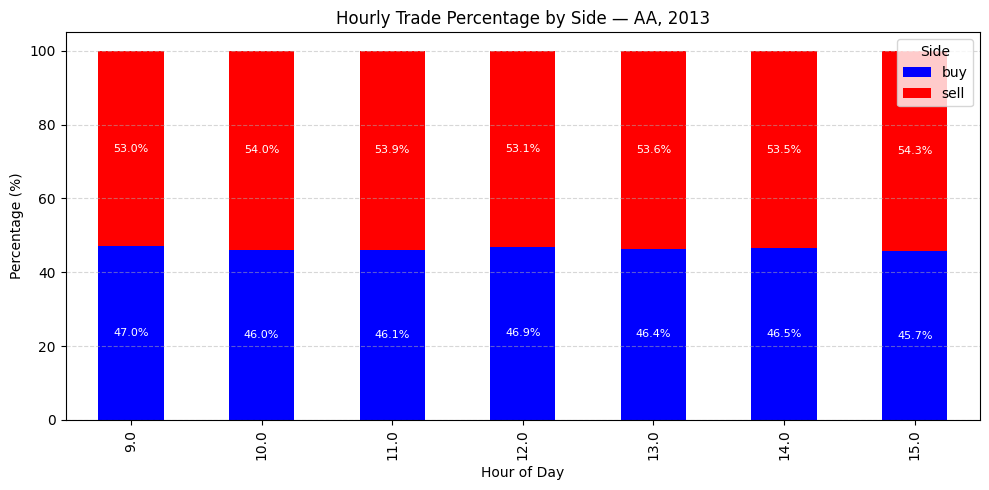

In [ ]:
# Hourly Trade Percentage By Side(3)
import matplotlib.pyplot as plt

hourly_percent = hourly_counts.div(hourly_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 5))

bars = hourly_percent.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['blue', 'red']
)

plt.title(f'Hourly Trade Percentage by Side — {ticker}, {year}')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Side')
plt.tight_layout()

for idx, (hour, row) in enumerate(hourly_percent.iterrows()):
    y_offset = 0
    for side in ['buy', 'sell']:
        value = row.get(side, 0)
        if value > 0:
            ax.text(
                idx,                  # x position
                y_offset + value / 2, # y position (center of the bar segment)
                f"{value:.1f}%",      # formatted text
                ha='center', va='center', fontsize=8, color='white' if value > 15 else 'black'
            )
            y_offset += value  # Stack height update

plt.show()


/tmp/ipython-input-15-1897759941.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_price = df.groupby(['hour', 'side'])['price'].mean().unstack().fillna(method='ffill')


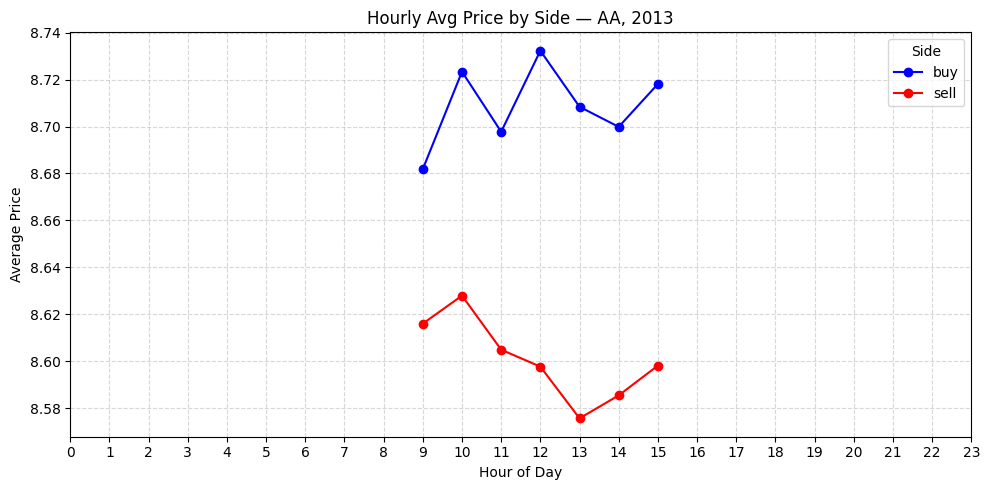

In [ ]:
# Hourly Average Price By Side(4)
hourly_price = df.groupby(['hour', 'side'])['price'].mean().unstack().fillna(method='ffill')

hourly_price.plot(kind='line', marker='o', figsize=(10, 5), color=['blue', 'red'])
plt.title(f'Hourly Avg Price by Side — {ticker}, {year}')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.legend(title='Side')
plt.tight_layout()
plt.show()


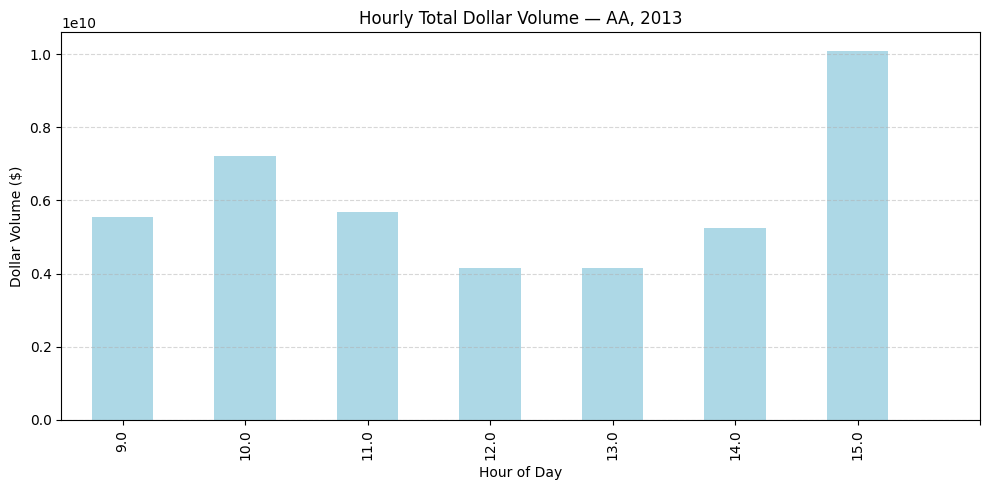

In [ ]:
# Hourly Dollar Volume (5)
df['dollar_volume'] = df['price'] * df['size']
hourly_dollar_volume = df.groupby('hour')['dollar_volume'].sum()

hourly_dollar_volume.plot(kind='bar', color='lightblue', figsize=(10, 5))
plt.title(f'Hourly Total Dollar Volume — {ticker}, {year}')
plt.xlabel('Hour of Day')
plt.ylabel('Dollar Volume ($)')
plt.xticks(range(0, 8))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


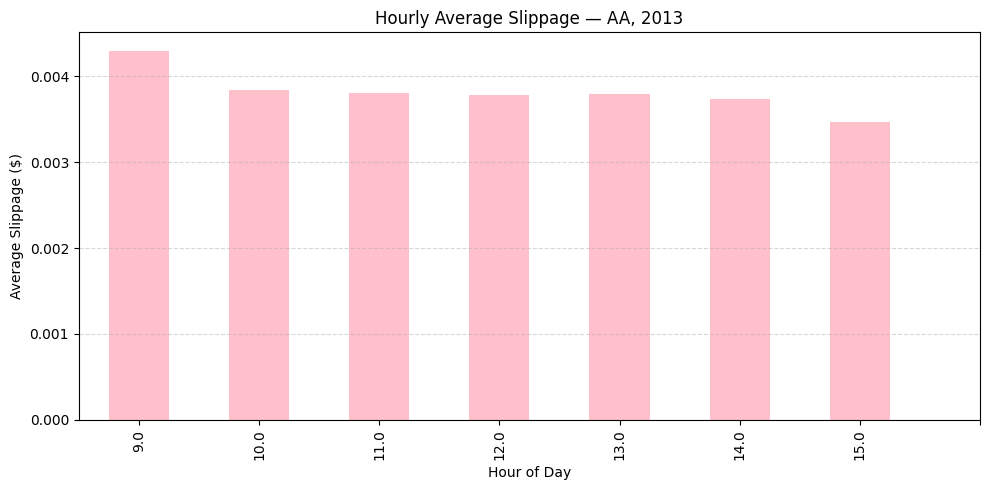

In [ ]:
# Average Slippage per Hour of Day：|price - midpoint|(6)
df['midpoint'] = (df['nbb'] + df['nbo']) / 2
df['slippage'] = abs(df['price'] - df['midpoint'])
df['hour'] = df['timestamp'].dt.hour

hourly_slippage = df.groupby('hour')['slippage'].mean()

hourly_slippage.plot(kind='bar', color='pink', figsize=(10, 5))
plt.title(f'Hourly Average Slippage — {ticker}, {year}')
plt.xlabel('Hour of Day')
plt.ylabel('Average Slippage ($)')
plt.xticks(range(0, 8))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Generating Meta Order

In [ ]:
import pandas as pd
import numpy as np
import os
from typing import List, Dict, Any, Literal

def mapping_function(
    num_trades: int,
    num_traders: int,
    distribution: Literal["homogeneous", "power-law"] = "homogeneous",
    power_law_exponent: float = 2.0,
) -> List[int]:
    """
    Implements Algorithm 2: Assigns synthetic trader IDs to trades.

    Args:
        num_trades (int): The total number of trades to assign.
        num_traders (int): The number of synthetic traders to create.
        distribution (str): The distribution of trading frequencies.
                            Can be 'homogeneous' or 'power-law'.
        power_law_exponent (float): The exponent for the power-law distribution.

    Returns:
        List[int]: A list of trader IDs, one for each trade.
    """
    # 1. Initialization
    if distribution == "homogeneous":
        # All traders have the same trading frequency
        frequencies = np.ones(num_traders)
    elif distribution == "power-law":
        # Frequencies are drawn from a power-law distribution P(f) ~ f^(-alpha)
        # We generate random variates using the transformation method
        frequencies = (1 - np.random.rand(num_traders)) ** (-1 / (power_law_exponent - 1))
    else:
        raise ValueError("Distribution must be either 'homogeneous' or 'power-law'")

    # 2. & 3. Define probabilities
    probabilities = frequencies / np.sum(frequencies)

    # 4. Compute cumulative probabilities
    cumulative_probabilities = np.cumsum(probabilities)

    # 5. Assign orders to agents
    trader_assignments = np.random.choice(
        np.arange(num_traders), size=num_trades, p=probabilities
    )

    return trader_assignments.tolist()


def generate_synthetic_metaorders(
    trade_data: pd.DataFrame,
    num_traders: int = 20,
    frequency_distribution: Literal["homogeneous", "power-law"] = "homogeneous",
    power_law_exponent: float = 2.0,
) -> pd.DataFrame:
    """
    Implements Algorithm 1: Generates synthetic metaorders from public trade data.

    Args:
        trade_data (pd.DataFrame): Preprocessed DataFrame with trade data.
                                 It must contain the following columns:
                                 - 'timestamp' (datetime-like): The time of the trade.
                                 - 'price' (float): The trade price.
                                 - 'volume' (int/float): The trade size.
                                 - 'side' (int): 1 for a buy, -1 for a sell.
        num_traders (int): The number of synthetic traders.
        frequency_distribution (str): The trading frequency distribution.
        power_law_exponent (float): The exponent for the power-law distribution.

    Returns:
        pd.DataFrame: A DataFrame containing the features of the generated
                      metaorders.
    """
    df = trade_data.copy()

    # Step 1: Load and clean trade data is assumed to be done prior to calling this function.

    # Step 2: Compute daily traded volume and intraday volatility
    daily_volume = df["volume"].sum()
    p0 = df["price"].iloc[0]
    daily_volatility = (df["price"].max() - df["price"].min()) / p0 if p0 != 0 else 0

    # Step 3: Randomly assign trades to traders using a mapping function
    num_trades = len(df)
    df["trader_id"] = mapping_function(
        num_trades, num_traders, frequency_distribution, power_law_exponent
    )

    # Step 4: Sort trades by traders and timestamp
    df = df.sort_values(by=["trader_id", "timestamp"])

    # Step 5: Define a metaorder as a sequence of trades of the same sign from the same trader
    df["metaorder_id"] = (
        (df["trader_id"] != df["trader_id"].shift(1)) |
        (df["side"] != df["side"].shift(1))
    ).cumsum()

    # Step 6: Compute metaorder features
    metaorders = df.groupby("metaorder_id").agg(
        start_time=("timestamp", "first"),
        end_time=("timestamp", "last"),
        start_price=("price", "first"),
        end_price=("price", "last"),
        num_child_orders=("price", "count"),
        total_volume=("volume", "sum"),
        trader_id=("trader_id", "first"),
        side=("side", "first"),
    )

    # Add other relevant quantities
    metaorders["duration"] = (metaorders["end_time"] - metaorders["start_time"]).dt.total_seconds()
    metaorders["price_impact"] = (metaorders["end_price"] - metaorders["start_price"]) * metaorders["side"]
    metaorders["Q_div_VD"] = metaorders["total_volume"] / daily_volume
    metaorders["I_div_sigmaD"] = (metaorders["price_impact"] / metaorders["start_price"]) / daily_volatility if daily_volatility != 0 else 0


    # Step 7: Aggregate and return only those with more than one child order
    metaorders_filtered = metaorders[metaorders["num_child_orders"] > 1].reset_index()

    return metaorders_filtered, df

if __name__ == '__main__':
    # --- User Configuration ---
    # As I cannot access your local file system, please replace the file path
    # and data loading logic with your own.
    FILE_PATH = "/content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2013/AA_wct_data_mod.csv"
    trade_df = pd.read_csv(FILE_PATH)
    print(f"Successfully loaded data from {FILE_PATH}")

    # try:
    #     # Attempt to load your actual CSV file.
    #     trade_df = pd.read_csv(FILE_PATH)
    #     print(f"Successfully loaded data from {FILE_PATH}")
    # except (FileNotFoundError, Exception) as e:
    #     print(f"Could not load data. Using dummy data instead. Error: {e}")
    #     # Create a dummy DataFrame with the specified column structure
    #     num_dummy_trades = 5000
    #     start_time = pd.Timestamp('2025-07-15 09:30:00')
    #     qtimes = [start_time + pd.Timedelta(milliseconds=i * 150) for i in range(num_dummy_trades)]
    #     prices = 150 + np.cumsum(np.random.randn(num_dummy_trades) * 0.02)

    #     trade_df = pd.DataFrame({
    #         'date': [t.date() for t in qtimes],
    #         'time_m': [t.time() for t in qtimes],
    #         'sym_root': 'XYZ',
    #         'sym_suffix': None,
    #         'type': 'Trade',
    #         'ex': 'Q',
    #         'tr_scond': 'F',
    #         'size': np.random.randint(50, 500, size=num_dummy_trades),
    #         'price': prices,
    #         'tr_seqnum': np.arange(num_dummy_trades),
    #         'qtime': qtimes,
    #         'nbo': prices + np.random.uniform(0.01, 0.05, size=num_dummy_trades),
    #         'nbb': prices - np.random.uniform(0.01, 0.05, size=num_dummy_trades),
    #         'nboqty': np.random.randint(100, 500, size=num_dummy_trades),
    #         'nbbqty': np.random.randint(100, 500, size=num_dummy_trades),
    #         'ticker': 'XYZ',
    #         'side': np.random.choice([1, -1], size=num_dummy_trades, p=[0.51, 0.49])
    #     })

    # --- 1b. Preprocess Data ---
    # The `generate_synthetic_metaorders` function expects specific column names:
    # 'timestamp', 'price', 'volume', 'side'.
    # Here, we rename and convert columns from the raw data format.
    print("\nPreprocessing raw trade data...")

    # Create the 'timestamp' column from 'qtime' (most precise time source).
    trade_df['timestamp'] = pd.to_datetime(trade_df['date'].astype(str) + ' ' + trade_df['qtime'].astype(str),format='mixed')

    # Rename 'size' to 'volume' and ensure it's a numeric type.
    trade_df.rename(columns={'size': 'volume'}, inplace=True)
    trade_df['volume'] = pd.to_numeric(trade_df['volume'], errors='coerce')

    # Ensure the 'price' column is numeric.
    trade_df['price'] = pd.to_numeric(trade_df['price'], errors='coerce')

    # Ensure the 'side' column is numeric (1 for buy, -1 for sell).
    # This converts string representations (like 'B'/'S') to numbers.
    if trade_df['side'].dtype == 'object':
        side_map = {'buy': 1, 'sell': -1}
        trade_df['side'] = trade_df['side'].map(side_map)

    # Coerce to numeric just in case there are mixed types, and drop any rows
    # that could not be converted properly (which become NaN).
    trade_df['side'] = pd.to_numeric(trade_df['side'], errors='coerce')
    trade_df.dropna(subset=['price', 'volume', 'side'], inplace=True)

    # Select only the required columns to create a clean DataFrame for processing.
    required_columns = ['timestamp', 'price', 'volume', 'side']
    for col in required_columns:
        if col not in trade_df.columns:
            raise ValueError(f"Required column '{col}' not found in DataFrame after preprocessing.")

    trade_data_processed = trade_df[required_columns]
    print("Preprocessing complete.")
    print("\nHead of the processed DataFrame passed to the function:")
    print(trade_data_processed.head())

    # --- 2. Generate Metaorders ---
    print("\nGenerating synthetic metaorders...")
    metaorders_df,child_orders_df = generate_synthetic_metaorders(
        trade_data=trade_data_processed,
        num_traders=50,
        frequency_distribution="power-law",
        power_law_exponent=2.5
    )

    # --- 3. Display Results ---
    print(f"\nGenerated {len(metaorders_df)} metaorders with more than one child order.")
    print("\nFirst 5 generated metaorders:")
    print(metaorders_df.head())


/tmp/ipython-input-18-907774860.py:127: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  trade_df = pd.read_csv(FILE_PATH)


Successfully loaded data from /content/drive/MyDrive/market_impact_summer2025/data/consolidated_trades/2013/AA_wct_data_mod.csv

Preprocessing raw trade data...
Preprocessing complete.

Head of the processed DataFrame passed to the function:
                timestamp  price  volume  side
0 2013-03-28 09:29:51.570   8.44   600.0     1
1 2013-01-16 09:28:27.791   8.88   100.0    -1
2 2013-01-16 09:28:27.791   8.88   100.0    -1
3 2013-01-16 09:28:27.791   8.88   100.0    -1
4 2013-01-16 09:28:27.791   8.88   100.0    -1

Generating synthetic metaorders...

Generated 2100784 metaorders with more than one child order.

First 5 generated metaorders:
   metaorder_id              start_time                end_time  start_price  \
0             2 2013-01-02 09:30:21.353 2013-01-02 09:30:21.467       8.8700   
1             3 2013-01-02 09:30:30.338 2013-01-02 09:31:08.235       8.8800   
2             5 2013-01-02 09:31:18.062 2013-01-02 09:31:47.903       8.8799   
3             6 2013-01-02 

In [ ]:
print(metaorders_df.columns)

Index(['metaorder_id', 'start_time', 'end_time', 'start_price', 'end_price',
       'num_child_orders', 'total_volume', 'trader_id', 'side', 'duration',
       'price_impact', 'Q_div_VD', 'I_div_sigmaD'],
      dtype='object')


In [ ]:
print(child_orders_df.columns)

Index(['timestamp', 'price', 'volume', 'side', 'trader_id', 'metaorder_id'], dtype='object')


# Recovering Metaorder Stylized Facts

3.1 Peak impact: the Square Root Law


--- Plotting Stylized Fact 1: The Square Root Law with Best Fit ---


/tmp/ipython-input-19-1810857191.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_impact = df_filtered.groupby('binned_Q').agg(


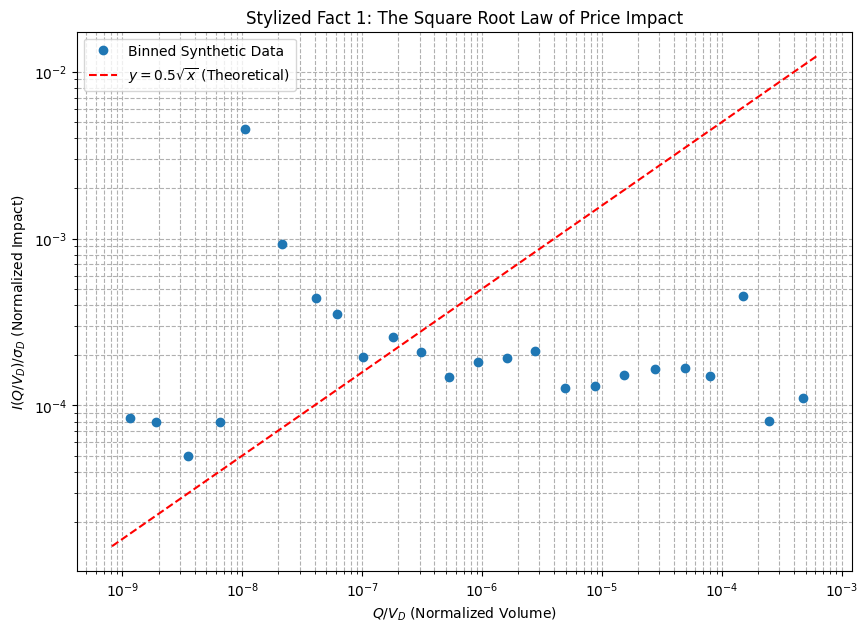

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Stylized Fact 1: Peak Impact - The Square Root Law ---
# Replicates Figure 1 from the paper
def plot_square_root_law(df):
    """
    Plots the Square Root Law, including a line of best fit in the form y = a*sqrt(x).
    """
    print("\n--- Plotting Stylized Fact 1: The Square Root Law with Best Fit ---")

    # Remove outliers for a cleaner plot
    df_filtered = df[df['I_div_sigmaD'] > 0].copy()

    # Create logarithmic bins for Q/VD
    # Using .copy() above avoids a SettingWithCopyWarning
    min_q = df_filtered['Q_div_VD'].min()
    max_q = df_filtered['Q_div_VD'].max()
    bins = np.logspace(np.log10(min_q), np.log10(max_q), 25)
    df_filtered['binned_Q'] = pd.cut(df_filtered['Q_div_VD'], bins=bins)

    # Group by bins and calculate the mean for plotting
    binned_impact = df_filtered.groupby('binned_Q').agg(
        mean_Q_div_VD=('Q_div_VD', 'mean'),
        mean_I_div_sigmaD=('I_div_sigmaD', 'mean')
    ).dropna()

    # --- Calculate the line of best fit: y = a * sqrt(x) ---
    y_data = binned_impact['mean_I_div_sigmaD']
    x_sqrt_data = np.sqrt(binned_impact['mean_Q_div_VD'])

    # Using the least squares formula for regression through the origin (y = ax)
    # where X is our sqrt(x) data. The formula for 'a' is sum(Xy) / sum(X^2).
    a = np.sum(x_sqrt_data * y_data) / np.sum(x_sqrt_data**2)

    # --- Plotting ---
    plt.figure(figsize=(10, 7))
    plt.loglog(binned_impact['mean_Q_div_VD'], binned_impact['mean_I_div_sigmaD'], 'o', label='Binned Synthetic Data', zorder=5)

    # Define the x-range for plotting the lines
    x_vals = np.logspace(np.log10(min_q), np.log10(max_q), 100)

    # [cite_start]Plot the theoretical square root line for comparison [cite: 98, 99]
    y_theory = 0.5 * np.sqrt(x_vals)
    plt.loglog(x_vals, y_theory, 'r--', label=r'$y = 0.5 \sqrt{x}$ (Theoretical)')

    # Plot the calculated line of best fit
    # y_fit = a * np.sqrt(x_vals)
    # plt.loglog(x_vals, y_fit, 'g-.', label=f'Best Fit: y = {a:.3f} * sqrt(x)')

    plt.title('Stylized Fact 1: The Square Root Law of Price Impact')
    plt.xlabel(r'$Q/V_D$ (Normalized Volume)')
    plt.ylabel(r'$I(Q/V_D) / \sigma_D$ (Normalized Impact)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

plot_square_root_law(metaorders_df.copy())

3.2 Role of metaorder duration


--- Plotting Stylized Fact 2: Independence from Duration ---


/tmp/ipython-input-20-269969314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['binned_duration'] = pd.cut(df_filtered['duration_min'], bins=bins)
/tmp/ipython-input-20-269969314.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_duration_impact = df_filtered.groupby('binned_duration').agg(


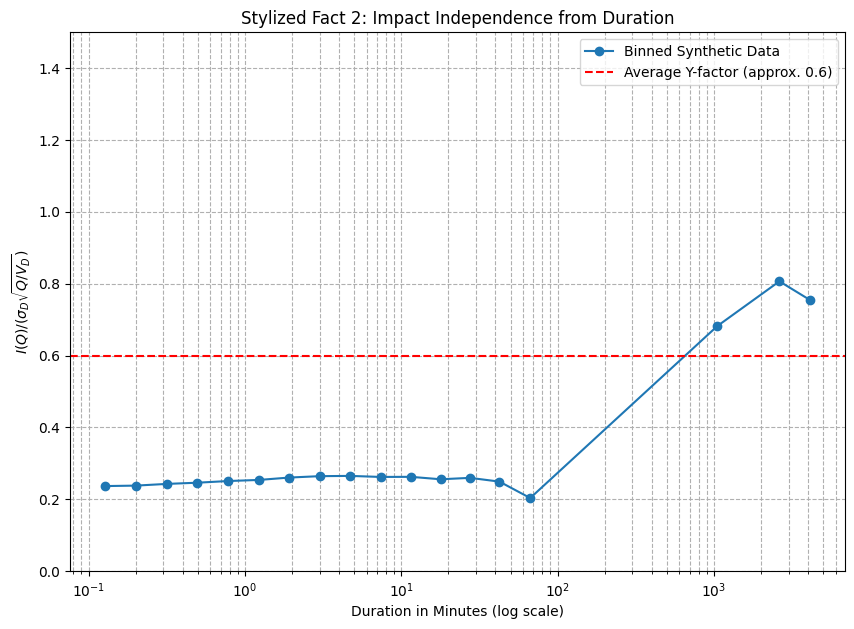

In [ ]:
# --- Stylized Fact 2: Role of Metaorder Duration ---
# [cite_start]Replicates Figure 3 from the paper [cite: 195]
def plot_duration_independence(df):
    """
    Shows that normalized impact is largely independent of metaorder duration.
    """
    print("\n--- Plotting Stylized Fact 2: Independence from Duration ---")

    # [cite_start]Calculate the Y-factor (impact normalized by sqrt of volume) [cite: 196]
    df['Y_factor'] = df['I_div_sigmaD'] / np.sqrt(df['Q_div_VD'])
    df['duration_min'] = df['duration'] / 60

    # Filter for realistic values
    df_filtered = df[(df['Y_factor'] > 0.1) & (df['Y_factor'] < 2.0) & (df['duration_min'] > 0.1)]

    # Create logarithmic bins for duration
    bins = np.logspace(np.log10(df_filtered['duration_min'].min()), np.log10(df_filtered['duration_min'].max()), 25)
    df_filtered['binned_duration'] = pd.cut(df_filtered['duration_min'], bins=bins)

    binned_duration_impact = df_filtered.groupby('binned_duration').agg(
        mean_duration=('duration_min', 'mean'),
        mean_Y_factor=('Y_factor', 'mean')
    ).dropna()

    # Plotting
    plt.figure(figsize=(10, 7))
    plt.semilogx(binned_duration_impact['mean_duration'], binned_duration_impact['mean_Y_factor'], 'o-', label='Binned Synthetic Data')

    plt.axhline(y=0.6, color='r', linestyle='--', label='Average Y-factor (approx. 0.6)')

    plt.title('Stylized Fact 2: Impact Independence from Duration')
    plt.xlabel('Duration in Minutes (log scale)')
    plt.ylabel(r'$I(Q) / (\sigma_D \sqrt{Q/V_D})$')
    plt.grid(True, which="both", ls="--")
    plt.ylim(0, 1.5)
    plt.legend()
    plt.show()

plot_duration_independence(metaorders_df.copy())


--- Plotting Stylized Fact 3: Concave Execution Profile from Your Data ---


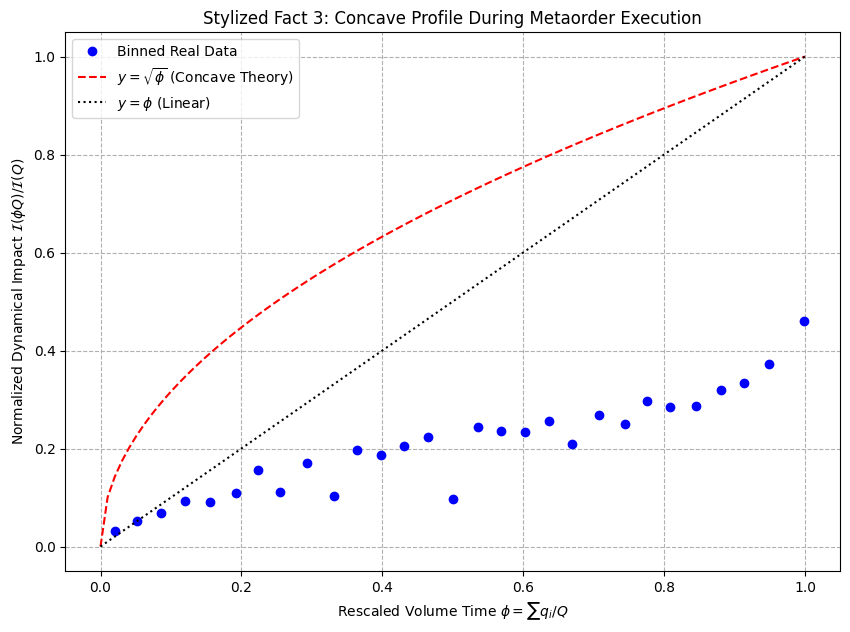

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_concave_profile_from_data(metaorders_df, child_orders_df):
    """
    Recovers the concave execution profile using your specific data columns.

    This function requires two DataFrames:
    1. metaorders_df: Summary data for each metaorder, including 'metaorder_id',
       'start_price', and 'price_impact'.
    2. child_orders_df: Granular data for each child trade, using your columns:
       ['timestamp', 'price', 'volume', 'metaorder_id', ...].

    It plots the normalized dynamical impact against the fraction of executed volume (phi).
    """
    print("\n--- Plotting Stylized Fact 3: Concave Execution Profile from Your Data ---")

    # --- 1. Merge the two DataFrames ---
    # This adds the metaorder's start_price and final price_impact to each child order row.
    full_data = pd.merge(
        child_orders_df,
        metaorders_df[['metaorder_id', 'start_price', 'price_impact', 'side']],
        on='metaorder_id',
        suffixes=('', '_meta') # <-- SOLUTION HERE
    )

    # ... (code for sorting and calculating phi remains the same) ...
    full_data = full_data.sort_values(by=['metaorder_id', 'timestamp']).reset_index(drop=True)
    full_data['cumulative_volume'] = full_data.groupby('metaorder_id')['volume'].cumsum()
    total_volumes = full_data.groupby('metaorder_id')['cumulative_volume'].max().to_dict()
    full_data['total_volume'] = full_data['metaorder_id'].map(total_volumes)
    full_data['phi'] = full_data['cumulative_volume'] / full_data['total_volume']


    # --- 2. Use the correct 'side_meta' for calculations ---
    # Explicitly use the side from the metaorder for signing the impact.
    full_data['dynamical_impact'] = (full_data['price'] - full_data['start_price']) * full_data['side_meta']

    # Normalize by the final impact (also from the metaorder)
    epsilon = 1e-9
    full_data['normalized_impact'] = full_data['dynamical_impact'] / (full_data['price_impact'] + epsilon)


    # Filter out invalid results from the normalization
    full_data = full_data[(full_data['normalized_impact'] >= -0.5) & (full_data['normalized_impact'] <= 1.5)]


    # --- 3. Bin the data and plot ---
    bins = np.linspace(0, 1, 30)
    full_data['binned_phi'] = pd.cut(full_data['phi'], bins=bins, labels=False, include_lowest=True)

    binned_profile = full_data.groupby('binned_phi').agg(
        mean_phi=('phi', 'mean'),
        mean_normalized_impact=('normalized_impact', 'mean')
    ).dropna()

    plt.figure(figsize=(10, 7))
    plt.plot(binned_profile['mean_phi'], binned_profile['mean_normalized_impact'], 'o', c='blue', label='Binned Real Data')

    # Plot theoretical curves for comparison
    phi_vals = np.linspace(0, 1, 100)
    plt.plot(phi_vals, np.sqrt(phi_vals), 'r--', label=r'$y = \sqrt{\phi}$ (Concave Theory)')
    plt.plot(phi_vals, phi_vals, 'k:', label=r'$y = \phi$ (Linear)')

    plt.title('Stylized Fact 3: Concave Profile During Metaorder Execution')
    plt.xlabel(r'Rescaled Volume Time $\phi = \sum q_i / Q$')
    plt.ylabel(r'Normalized Dynamical Impact $\mathcal{I}(\phi Q) / \mathcal{I}(Q)$')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

# 3. Run the function with the sample data
plot_concave_profile_from_data(metaorders_df, child_orders_df)


--- Plotting Stylized Fact 4: Post-Execution Decay ---


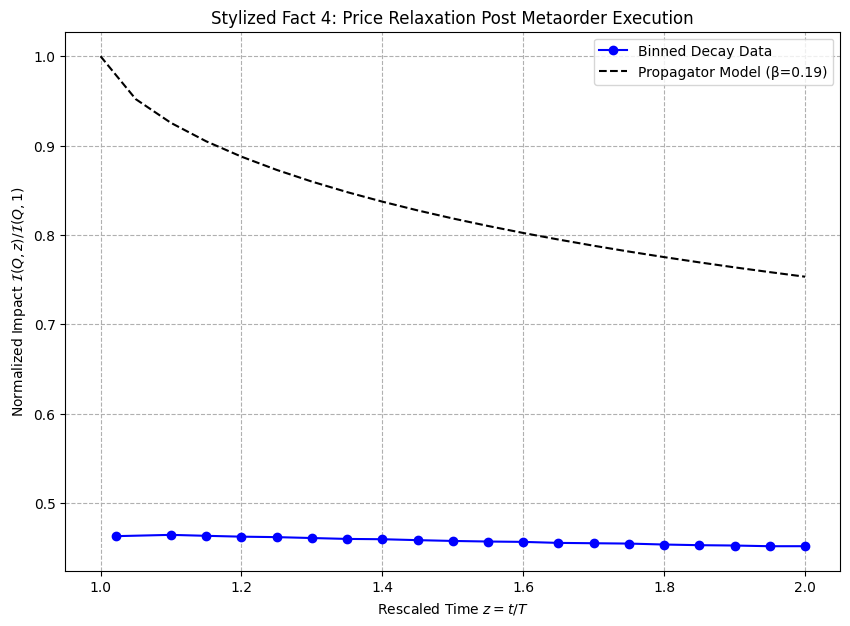

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_post_execution_decay(metaorders_df, all_trades_df):
    """
    Recovers post-execution decay using a comprehensive trades DataFrame.
    """
    print("\n--- Plotting Stylized Fact 4: Post-Execution Decay ---")

    # --- 1. Prepare data and ensure chronological order ---
    # Set timestamp as the index and sort it to guarantee chronological order.
    market_prices = all_trades_df.set_index('timestamp')['price'].sort_index()

    z_values = np.linspace(1.0, 2.0, 21)
    decay_data = []

    # --- 2. Calculate impact at future time points ---
    for _, metaorder in metaorders_df.iterrows():
        duration = metaorder['end_time'] - metaorder['start_time']
        if duration.total_seconds() == 0:
            continue

        for z in z_values:
            future_timestamp = metaorder['start_time'] + z * duration

            try:
                # Use 'asof' for efficient lookup on the sorted series
                future_price = market_prices.asof(future_timestamp)
            except (TypeError, KeyError):
                continue

            impact_at_z = (future_price - metaorder['start_price']) * metaorder['side']
            peak_impact = metaorder['price_impact']
            epsilon = 1e-9
            normalized_decay = impact_at_z / (peak_impact + epsilon)

            decay_data.append({'z': z, 'normalized_decay': normalized_decay})

    decay_df = pd.DataFrame(decay_data)
    decay_df = decay_df[decay_df['normalized_decay'].between(0, 2)]

    # --- 3. Bin the data and plot ---
    bins = np.linspace(1.0, 2.0, 21)
    decay_df['binned_z'] = pd.cut(decay_df['z'], bins=bins, labels=False, include_lowest=True)
    binned_decay = decay_df.groupby('binned_z').agg(
        mean_z=('z', 'mean'),
        mean_decay=('normalized_decay', 'mean')
    ).dropna()

    plt.figure(figsize=(10, 7))
    plt.plot(binned_decay['mean_z'], binned_decay['mean_decay'], 'o-', c='blue', label='Binned Decay Data')

    beta = 0.19
    theoretical_decay = (z_values**(1 - beta) - (z_values - 1)**(1 - beta))
    plt.plot(z_values, theoretical_decay, 'k--', label=f'Propagator Model (β={beta})')

    plt.title('Stylized Fact 4: Price Relaxation Post Metaorder Execution')
    plt.xlabel(r'Rescaled Time $z = t/T$')
    plt.ylabel(r'Normalized Impact $\mathcal{I}(Q,z) / \mathcal{I}(Q,1)$')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

plot_post_execution_decay(metaorders_df, child_orders_df)